<center>
<font size='7' style="color:#0D47A1">  <b>ARTIFICIAL NEURAL NETWORKS</b> </font>
</center>


<hr style= "height:3px;">
<br>

<font size='6' style="color:#00A6D6">  <b>Introduction</b> </font>

Artificial neural networks (ANN) are a class of general functions used in machine learning.  When trying to map input data to output data, historically two general strategies have been employed:
1. Find the appropriate functional form.  We do this frequently in science and engineering when we find equations such as the Fick's law of diffusion \begin{equation}\boldsymbol{J} = -d \nabla \phi \end{equation} where $d$ is the diffusivity, $\boldsymbol{J}$ is the diffusion flux and $\phi$ is the concentration.
2. Fit a very generic functional form which is complex enough to hopefully capture the data.  Cubic spline and high order polynomial are general examples.

If we are trying to sell machine learning or deep learning, we would note that artificial neural networks are a new case: a type of function which learns the functional form.  If we are unimpressed by machine learning, then we would note that ANNs are a special type of generic form with a clever innovation.  

What makes neural networks so powerful and useful?  The fact that they are hierachical in nature.  That is they can look for patterns within patterns.  Or rather, they are multiscale in nature.  For example in the digit recognition problem, they can look for the pieces that nines have in common, a single line on the bottom right, a circle in the top with one layer and then combine these in the next to guess nine.


Some definition:, we will define $\phi$ as the function which is to be fit, or the learning function. $\phi = \phi(\boldsymbol{x}, \boldsymbol{\theta})$ where $\boldsymbol{x}$ is the inputs and $\boldsymbol{\theta}$ is are the parameters which are to be learned.






<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>The mathematics of ANNs</b> </font>

The first innovation of neural networks consists of layers of functions which are used to fit data.  That is $\phi = f_1(f_2(f_3...(f_n(\boldsymbol{x}))...))$.  The second innovation is that our functions $f_i$ are typically a collection of functions leading to multiple outputs.  This allows something which looks like a network hence the network part of artificial neural networks (See Figure Below).


<span style="color:blue"> Creating your own neural network in python</span> KERAS w/ Tensor FLOW

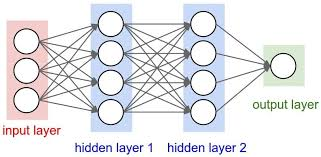

In [1]:
from IPython.display import Image
Image("neuralNetwork.jpeg")

Here, we have a series of functions which take input variables to an intermediate variable set which is called hidden layer 1.  A second set of functions will map hidden layer 1 to hidden layer 2 this process can repeat as desired until we finally map to the output y.

The question then becomes, what is a good general form for the individual functions?  It turns out that the sigmoid function is a good choice. Why because the sum can be made to fit arbitrary curves in the same way splines can. The sigmoid function is given by
\begin{equation}
\sum_i \frac{1}{1+\mathrm{e}^{w \cdot x + b}}
\end{equation}
where $b$ is the bias value, $w_i$ is the weight assigned to each input, $x_i$.  $w_i$ and $b$ are parameters to be fit.



<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>A Circuit Approach to Neural Networks</b> </font>

This approach is similar to how and electrical engineer or a computer scientist would approach neural networks.  Understanding this approach is important because it proves how versatile neural networks are.  Additionally this is the common approach seen within the machine learning community.

To start I will begin with a description of a perceptron. A perceptron is a function which takes in several inputs $x_1$, $x_2$, ... and outputs a single binary number.  The rule for the perceptrons is the output is given by
\begin{equation}
\mathrm{output} = \begin{cases}
1 & \mathrm{if} \; \sum_i w_i x_i > t \\
0 & \mathrm{otherwise}
\end{cases}
\end{equation}

where $t$ is the threshold value, $w_i$ is the weight assigned to each input.

Frequently this is rewritten for compactness as
\begin{equation}
\mathrm{output} = \begin{cases}
1 & \mathrm{if} \; w \cdot x + b > 0 \\
0 & \mathrm{otherwise}
\end{cases}
\end{equation}
where $b = -t$ is the bias.


It is entirely possible to rewrite functions based on perceptrons.  For instance, the logical expressions can be written as a series of networks.
For instance "and" can be given by $w_i = 2\;,\;i = 1,2$ and b = 3.  Like wise "or" can be given by $w_i = 2\;,\;i = 1,2$ and b = 1. "Not and" can be given as w_i = -2 and b = -3.


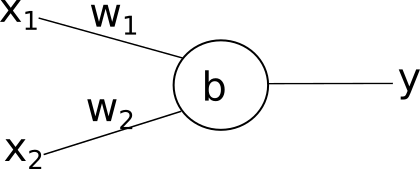

In [2]:
from IPython.display import Image
Image("neuron.png")

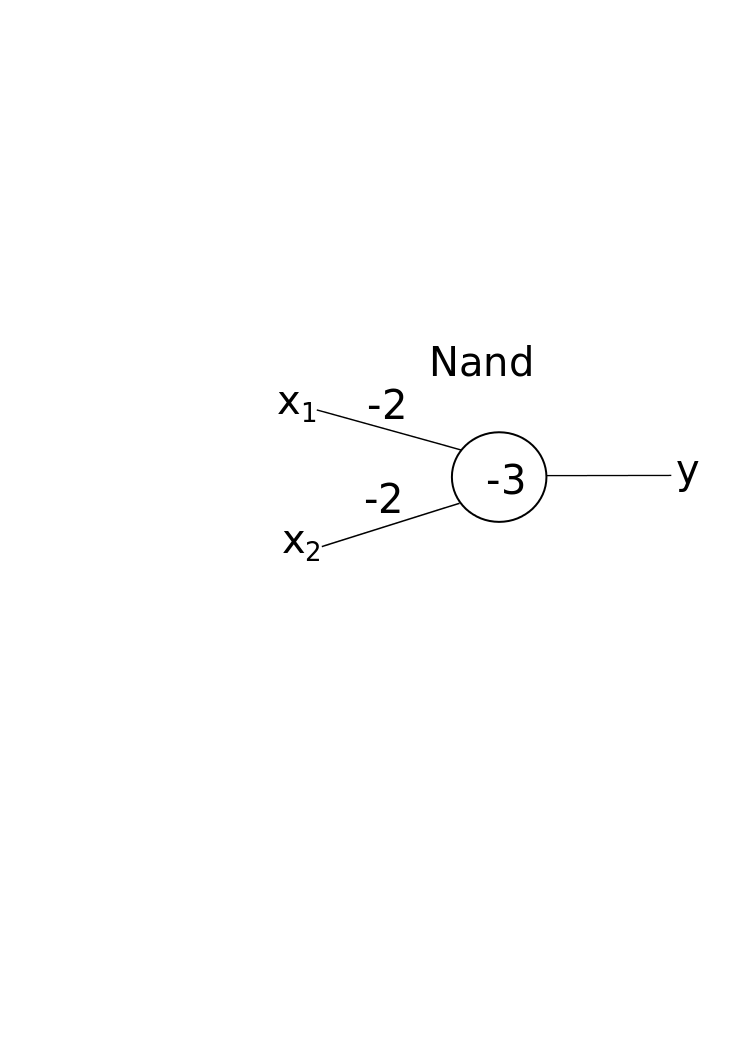

In [3]:
from IPython.display import Image
Image("NANDneuron.png")

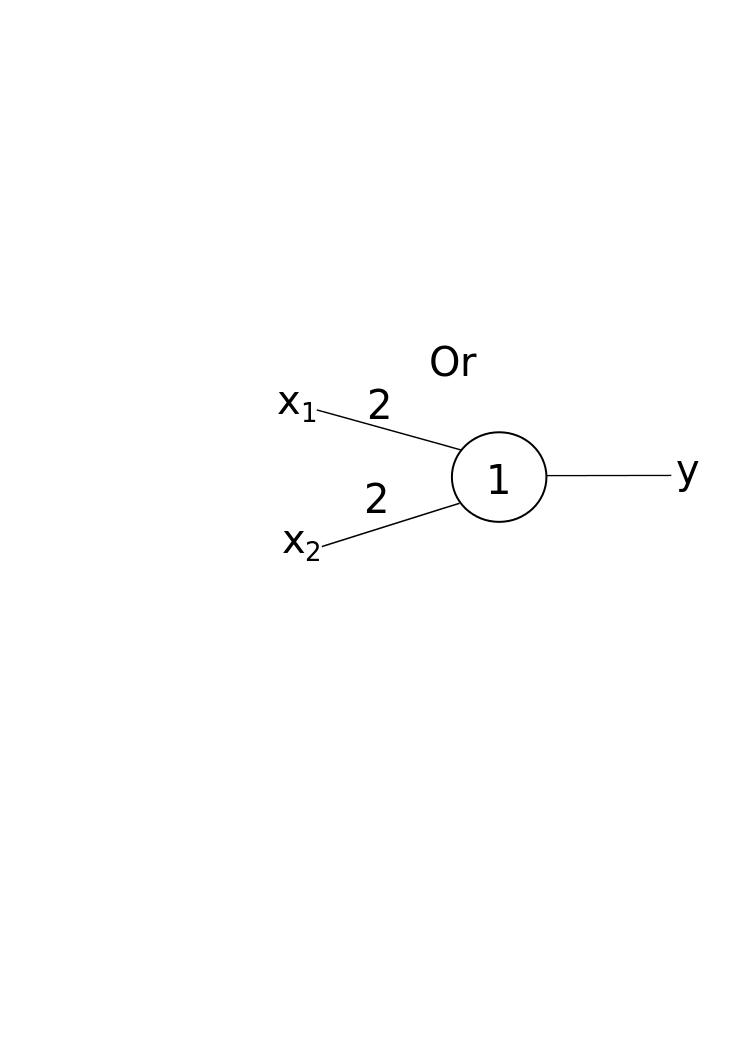

In [2]:
from IPython.display import Image
Image("OrNeuron.png")

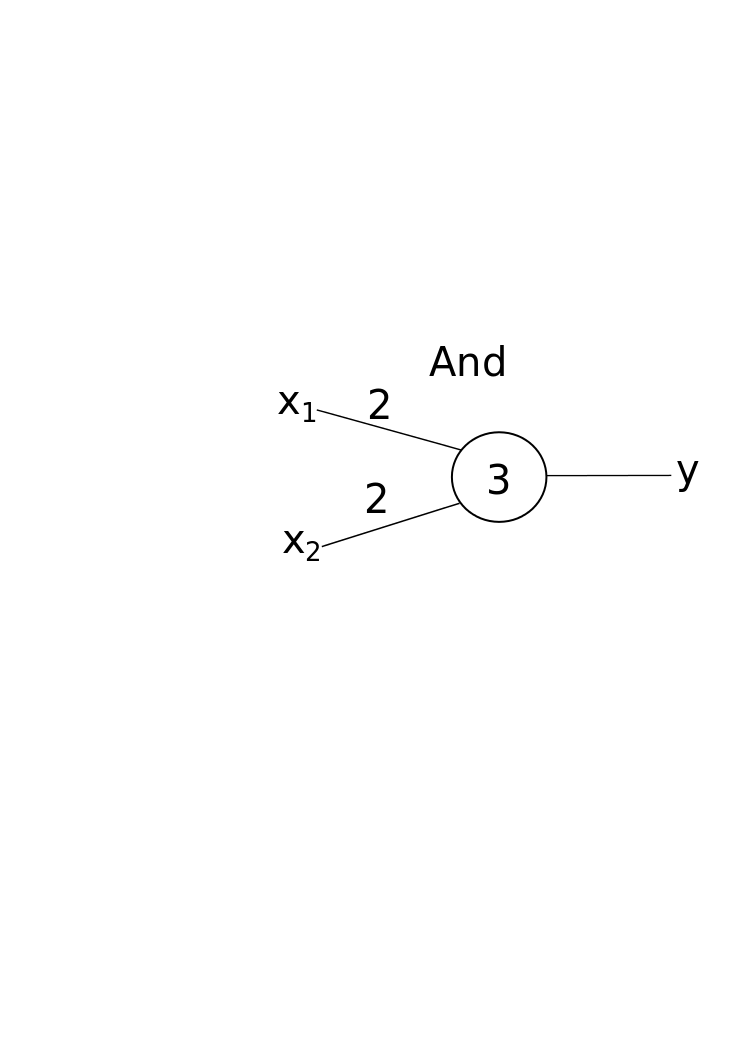

In [4]:
from IPython.display import Image
Image("AndNeuron.png")

If you are a computer scientist, this is really nice.  Why? Because we can create the basic algorithmic blocks of logic--"and", "or", "not"--out of neurons.  Therefore, we can, theoretically recreate any algorithm.  Or rather, a large enough network of these neurons can model anything that is computable--which is a whole lot of things.

We have a practical problem.  The step function used in not differentiable.  This means all of the nice algorithms for learning weights (such as gradient descent) are not applicable.  Therefore, instead of using a step function, most scientists use a neuron where the step function is smooth instead of discrete. 
Commonly a sigmoid is used
\begin{equation}
y = \frac{1}{1+\mathrm{e}^{w \cdot x + b}}
\end{equation}
but the arctangent function is also used.

The following function plots a sigmoid and step function.

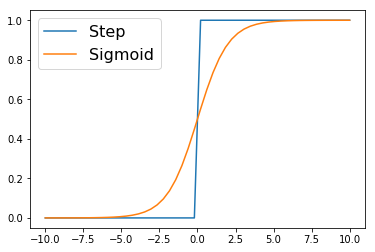

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def stepFunction(z,b):
    return z>b

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

x = np.linspace(-10,10)
y = stepFunction(x,0)
y2 = sigmoid(x)
fig = plt.figure()
plt.plot(x,y, label = 'Step')
plt.hold
plt.plot(x,y2, label = 'Sigmoid')
plt.legend(fontsize = '16')
plt.show()

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Tensorflow Implementation</b> </font>

Before getting our hands dirty with code, lets play a little bit with neural networks.  The tensor flow playground is one of the best places to go play and develop an intuitve feel for how they work.  http://playground.tensorflow.org


<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Strengths/Weaknesses</b> </font>

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Homework</b> </font>


The equation $\phi = f_1(f_2(f_3...(f_n(\boldsymbol{x}))...))$ for us implies $f_i(x)=\sigma_i(Wx+B)$, $W$ a matrix and $\sigma_i$ a non linear function. Assume that all $\sigma_i$ are the identity function.  Find $W_0$ and $B_0$ such that $\phi (x) = W_0x+B_0$.


Can you describe how is this case related to SVM?


Consider the points $\{(0,0,0),(0,0,1),(0,1,0),(1,0,0),(0,1,1),(1,1,0),(1,0,1),(1,1,1)\}.$ Find the coefficients of a function $\phi = f_1(f_2(f_3...(f_n(\boldsymbol{x}))...)), f_i(x)=\sigma(Wx+b)$ that classifies  $\{(0,0,0),(0,0,1),(0,1,0),(1,0,0),\}$ as 0 and  $\{(0,1,1),(1,1,0),(1,0,1),(1,1,1)\}$ as 1. 



<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Summary</b> </font>

1. Neural networks are a hierachical (or deep) method
2. At a basic level, neural networks can represent logic functions (and, or, nand) and therefore are generalizable to any complicated computer function (given enough blocks).
3. It is still not clear what is the number of functions to use, the deepness of the ANN. 




<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Bilbliography and Credits</b> </font>

    * http://neuralnetworksanddeeplearning.com 
    * https://github.com/alrojo/tensorflow-tutorial
    * http://playground.tensorflow.org